In [151]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  # accessor needed to parse crs
import calendar
import argparse
import seaborn as sns
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import glob

import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np



In [120]:
path = '~/dales/build/stable_runs/high_shear_output'
# case = 'stable_low_shear'
# path = '/home/smmrrr/dales/build/case4'
# case = 'case4'
# cross=xr.open_dataset(path+case+'/crossxz.x000y000.001.nc')

profile = xr.open_dataset(path +'/profiles.001.nc')
tmser = xr.open_dataset(path +'/tmser.001.nc')

tmser

<xarray.Dataset>
Dimensions:   (time: 250)
Coordinates:
  * time      (time) float32 60.0 120.0 180.0 ... 1.488e+04 1.494e+04 1.5e+04
Data variables: (12/33)
    cfrac     (time) float32 ...
    zb        (time) float32 ...
    zc_av     (time) float32 ...
    zc_max    (time) float32 ...
    zi        (time) float32 ...
    we        (time) float32 ...
    ...        ...
    rs        (time) float32 ...
    ra        (time) float32 ...
    cliq      (time) float32 ...
    Wl        (time) float32 ...
    rssoil    (time) float32 ...
    rsveg     (time) float32 ...
Attributes:
    title:    tmser.001.nc
    history:  Created on 20230610 at 150901.905
    Source:   DALES 4.4 git: v4.4
    Author:

In [59]:
tmser = xr.open_dataset('~/tmser.001.nc')

tmser

<xarray.Dataset>
Dimensions:   (time: 60)
Coordinates:
  * time      (time) float32 60.0 120.0 180.0 ... 3.48e+03 3.54e+03 3.6e+03
Data variables: (12/33)
    cfrac     (time) float32 ...
    zb        (time) float32 ...
    zc_av     (time) float32 ...
    zc_max    (time) float32 ...
    zi        (time) float32 ...
    we        (time) float32 ...
    ...        ...
    rs        (time) float32 ...
    ra        (time) float32 ...
    cliq      (time) float32 ...
    Wl        (time) float32 ...
    rssoil    (time) float32 ...
    rsveg     (time) float32 ...
Attributes:
    title:    tmser.001.nc
    history:  Created on 20230610 at 131956.291
    Source:   DALES 4.4 git: v4.4
    Author:

In [8]:
path = '/home/smmrrr/dales/build/stable_runs/'
case = 'stable_low_shear'

sec = 'crossxy.0002.x000y002.001.nc'


cross=xr.open_dataset(path+case+'/'+sec)

cross

<xarray.Dataset>
Dimensions:  (xt: 64, xm: 64, yt: 16, ym: 16, time: 0)
Coordinates:
  * xt       (xt) float32 3.125 9.375 15.62 21.88 ... 378.1 384.4 390.6 396.9
  * xm       (xm) float32 0.0 6.25 12.5 18.75 25.0 ... 375.0 381.2 387.5 393.8
  * yt       (yt) float32 203.1 209.4 215.6 221.9 ... 278.1 284.4 290.6 296.9
  * ym       (ym) float32 200.0 206.2 212.5 218.8 ... 275.0 281.2 287.5 293.8
  * time     (time) float32 
Data variables:
    uxy      (time, yt, xm) float32 ...
    vxy      (time, ym, xt) float32 ...
    wxy      (time, yt, xt) float32 ...
    thlxy    (time, yt, xt) float32 ...
    thvxy    (time, yt, xt) float32 ...
    qtxy     (time, yt, xt) float32 ...
    qlxy     (time, yt, xt) float32 ...
    buoyxy   (time, yt, xt) float32 ...
    qrxy     (time, yt, xt) float32 ...
    nrxy     (time, yt, xt) float32 ...
    e120xy   (time, yt, xt) float32 ...
Attributes:
    title:    crossxy.0002.x000y002.001.nc
    history:  Created on 20230609 at 191437.628
    Source:   DALES 4.4 git: v4.4
    Author:

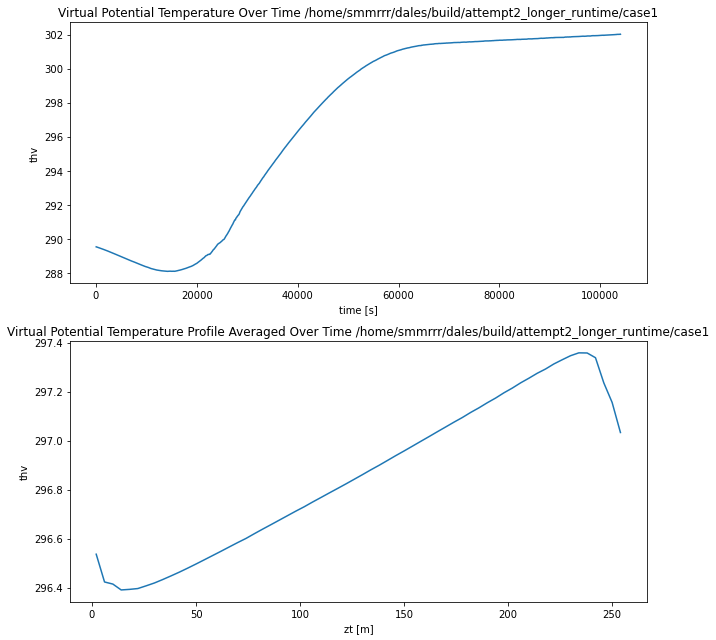

In [4]:
fig, axs = plt.subplots(nrows=2, figsize = (9, 9))
plot1 = profile.mean(dim = ['zt']).thv.plot(ax=axs[0])
plot2 = profile.mean(dim = ['time']).thv.plot(ax=axs[1])
plt.tight_layout()
axs[0].set_title('Virtual Potential Temperature Over Time ' +case)
axs[1].set_title('Virtual Potential Temperature Profile Averaged Over Time '+case)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Wind Speed (u) at Differnt Times stable_high_shear')

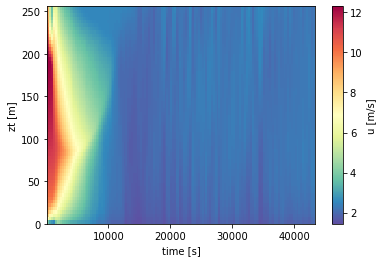

In [24]:
profile.sel(time=[time_step]).u.plot.pcolormesh(
        # ax=axes[i, 0],
        # vmin=-30,
        # vmax=2.5,
        cmap="Spectral_r",
        add_colorbar=True
        # extend="both",
    
, x='time'
    ,y='zt'
)

axs.set_title('Wind Speed (u) at Differnt Times '+case)


Text(0.5, 1.0, 'Wind Speed (u) at Differnt Times stable_high_shear')

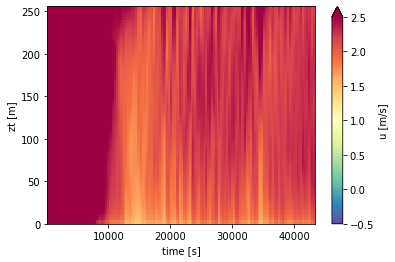

In [25]:
profile.u.plot.pcolormesh(
        # ax=axes[i, 0],
        vmin=-.5,
        vmax=2.5,
        cmap="Spectral_r",
        add_colorbar=True
        # extend="both",
    
, x='time'
    ,y='zt'
)

axs.set_title('Wind Speed (u) at Differnt Times '+case)


Text(0.5, 1.0, 'Wind Speed (u) at Differnt Times stable_low_shear')

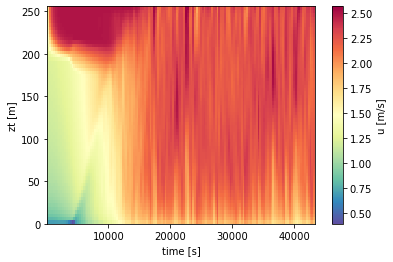

In [19]:
profile.u.plot.pcolormesh(
        # ax=axes[i, 0],
        # vmin=-30,
        # vmax=30,
            vmax=3,

        cmap="Spectral_r",
        add_colorbar=True
        # extend="both",
    , x='time'
    ,y='zt'
    )

axs.set_title('Wind Speed (u) at Differnt Times '+case)


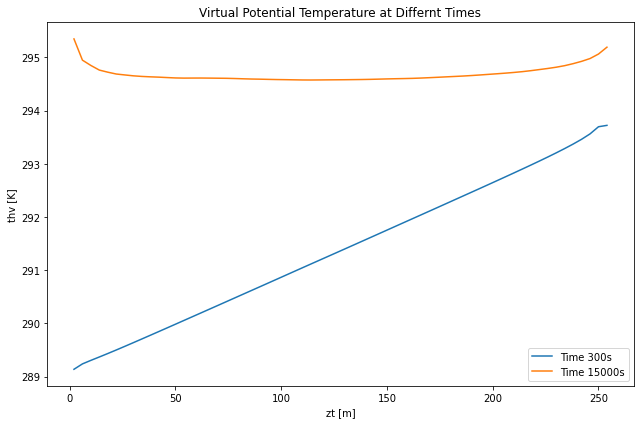

In [88]:
time_steps = [300, 15000]  # Example time steps

# Create subplots
fig, axs = plt.subplots(nrows=1, figsize=(9, 6))

# Plot each time step with labels
for time_step in time_steps:
    profile.sel(time=[time_step]).thv.plot(ax=axs, label=f'Time {time_step}s')

# Add any necessary customizations
plt.tight_layout()
axs.set_title('Virtual Potential Temperature at Differnt Times')
axs.legend()

# Show the plot
plt.show()

In [123]:
Rd = 287 #J/kgK
cp = 1005 #J/kgK

# pres = fog_profiles.variables['presh'].data
profile['pressure'] = profile['presh']/100
profile['virt_T'] = profile['thv']/((1000/profile['pressure'])**(Rd/cp))
# virt_T = virt_theta/((1000/pressure)**(Rd/cp))
# thl= fog_profiles.variables['thl'].data

# totalwater_q = fog_profiles.variables['qt'].data
# liquid_q = fog_profiles.variables['ql'].data
profile['spec_hum'] = profile['qt']-profile['ql']

profile['temp'] = profile['virt_T']/(1+0.61*profile['spec_hum'])

profile['pres'] = profile['pressure']*units.hPa
profile['temp'] = profile['temp']*units.K

profile['RH'] = mpcalc.relative_humidity_from_specific_humidity(profile['pres'] , profile['temp'], profile['spec_hum'])*100
# height = fog_profiles.variables['zt'].data
# time = fog_vars.variables['time'].data
mask = profile['RH'] < 100.00001

# Set the values to NaN where the mask is True
profile['supersat'] = xr.where(mask, np.nan, profile['RH'])

# profile['supersat'] = profile['RH'].copy()
# profile[profile['supersat']<100] = np.nan
# supersat = np.copy(RH)
# supersat[supersat<100] = np.nan
# avg_S = np.nanmean(supersat, axis=1)
# time_prof = fog_profiles.variables['time'].data



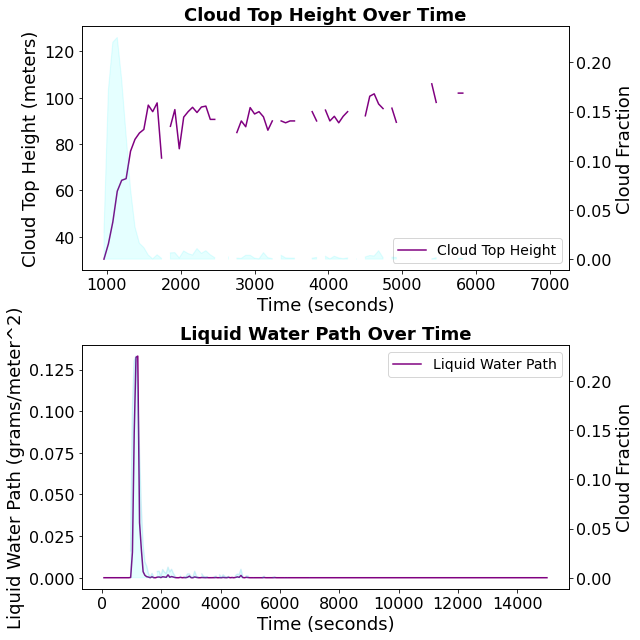

In [121]:
tmser['lwp_bar_m'] = tmser['lwp_bar']*1000

fig, axs = plt.subplots(nrows=2, figsize = (9, 9))

ax1 = axs[0]   # Line plot axis
ax2 = ax1.twinx()  # Bar plot axis

tmser.zc_av.plot(ax=ax1, color = 'purple')
tmser.cfrac.plot(ax=ax2, alpha=0.01)
ax2.fill_between(tmser['time'], tmser.cfrac, color='cyan', alpha=0.1, label='Shaded Area')



ax3 = axs[1]   # Line plot axis
ax4 = ax3.twinx()  # Bar plot axis

tmser.lwp_bar_m.plot(ax=ax3, color = 'purple')
tmser.cfrac.plot(ax=ax4, alpha=0.1)
ax4.fill_between(tmser['time'], tmser.cfrac, color='cyan', alpha=0.1, label='Shaded Area')

# ax5 = axs[2]   # Line plot axis
# ax6 = ax5.twinx()  # Bar plot axis

# tmser.cliq.plot(ax=ax5, color = 'purple')
# tmser.cfrac.plot(ax=ax6, alpha=0.01)
# ax6.fill_between(tmser['time'], tmser.cfrac, color='cyan', alpha=0.1, label='Shaded Area')

# # Add a legend for each variable
ax1.legend(['Cloud Top Height'], loc='lower right', fontsize=14)
# ax2.legend(['Cloud Fraction of Grid'], loc='upper right', fontsize=16)
ax1.tick_params(axis='both', labelsize=16)
ax2.tick_params(axis='both', labelsize=16)
# # Set common x-label for the entire subplot
ax1.set_xlabel('Time (seconds)', fontsize=18)
ax1.set_ylabel('Cloud Top Height (meters)', fontsize=18)
ax2.set_ylabel('Cloud Fraction', fontsize=18)
ax1.set_title('Cloud Top Height Over Time', fontsize=18, fontweight='bold')

# # Add a legend for each variable
ax3.legend(['Liquid Water Path'], loc='upper right', fontsize=14)
# ax2.legend(['Cloud Fraction of Grid'], loc='upper right', fontsize=16)
ax3.tick_params(axis='both', labelsize=16)
ax4.tick_params(axis='both', labelsize=16)
# # Set common x-label for the entire subplot
ax3.set_xlabel('Time (seconds)', fontsize=18)
ax3.set_ylabel('Liquid Water Path (grams/meter^2)', fontsize=18)
ax4.set_ylabel('Cloud Fraction', fontsize=18)
ax3.set_title('Liquid Water Path Over Time', fontsize=18, fontweight='bold')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()

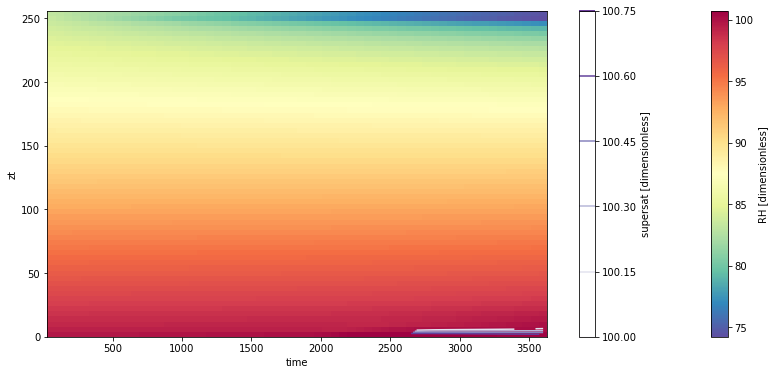

In [124]:
fig, axs = plt.subplots(nrows=1, figsize = (14, 6))
ax5 = axs  # Line plot axis
# ax6 = ax5.twinx()  # Bar plot axis

plot1 = profile.RH.plot.pcolormesh(
    ax = ax5,
        # ax=axes[i, 0],
        # vmin=-30,
        # vmax=30,
            # vmax=3,
        cmap="Spectral_r",
        add_colorbar=True
        # extend="both",
    , x='time'
    ,y='zt'
    )

plot1 = profile.supersat.plot.contour(
    ax = ax5,
        # ax=axes[i, 0],
        # vmin=-30,
        # vmax=30,
            # vmax=3,
        cmap="Purples",
        add_colorbar=True
        # extend="both",
    , x='time'
    ,y='zt'
    )



In [142]:
path = '~/dales/build/stable_runs/high_shear_output/'
file = 'crossyz.x000y001.001.nc'
cross = xr.open_dataset(path + file)
cross

<xarray.Dataset>
Dimensions:  (yt: 16, ym: 16, zt: 64, zm: 64, time: 250)
Coordinates:
  * yt       (yt) float32 103.1 109.4 115.6 121.9 ... 178.1 184.4 190.6 196.9
  * ym       (ym) float32 100.0 106.2 112.5 118.8 ... 175.0 181.2 187.5 193.8
  * zt       (zt) float32 2.0 6.0 10.0 14.0 18.0 ... 242.0 246.0 250.0 254.0
  * zm       (zm) float32 0.0 4.0 8.0 12.0 16.0 ... 240.0 244.0 248.0 252.0
  * time     (time) float32 60.0 120.0 180.0 ... 1.488e+04 1.494e+04 1.5e+04
Data variables:
    uyz      (time, zt, yt) float32 ...
    vyz      (time, zt, ym) float32 ...
    wyz      (time, zm, yt) float32 ...
    thlyz    (time, zt, yt) float32 ...
    thvyz    (time, zt, yt) float32 ...
    qtyz     (time, zt, yt) float32 ...
    qlyz     (time, zt, yt) float32 ...
    buoyyz   (time, zt, yt) float32 ...
    qryz     (time, zt, yt) float32 ...
    nryz     (time, zt, yt) float32 ...
    e120yz   (time, zt, yt) float32 ...
Attributes:
    title:    crossyz.x000y001.001.nc
    history:  Created on 20230610 at 150901.948
    Source:   DALES 4.4 git: v4.4
    Author:

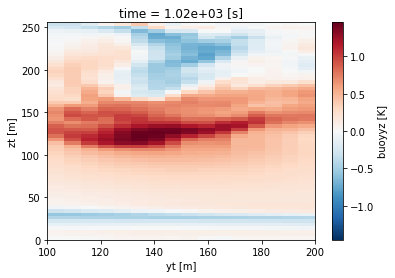

In [157]:
cross.sel(time = [1000], method="nearest").buoyyz.plot()

TypeError: 'Axes' object is not iterable

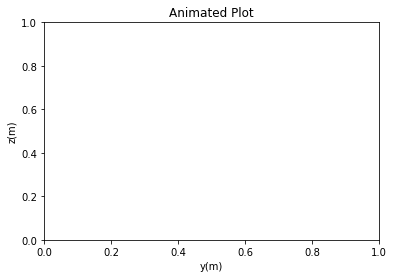

In [154]:
fig, ax = plt.subplots()
# Define the initialization function
def init():
    ax.set_xlabel('y(m)')
    ax.set_ylabel('z(m)')
    ax.set_title('Animated Plot')
    return ax

# Define the update function
def update(frame):
    ax.cla()  # Clear the axis for the new frame
    cross.buoyyz[frame].plot(ax=ax, cmap='viridis', add_colorbar=False)
    plt.colorbar(mappable=ax.images[-1], ax=ax)
    ax.set_xlabel('y(m)')
    ax.set_ylabel('z(m)')
    ax.set_title(f'Time = {data.time[frame]}')
    return ax

# Create the animation
anim = FuncAnimation(fig, update, frames=cross.time.size, init_func=init, blit=True)

# Display the animation
plt.show()


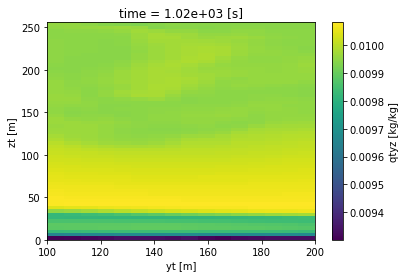

In [146]:
cross.sel(time = [1000], method="nearest").qtyz.plot()

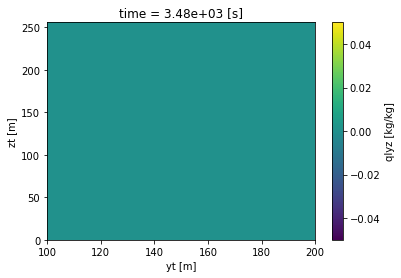

In [145]:
cross.sel(time = [3500], method="nearest").qlyz.plot()

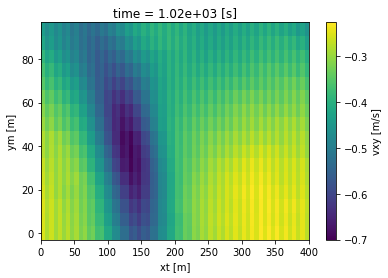

In [140]:
cross.sel(time = [1000], method="nearest").vxy.plot()

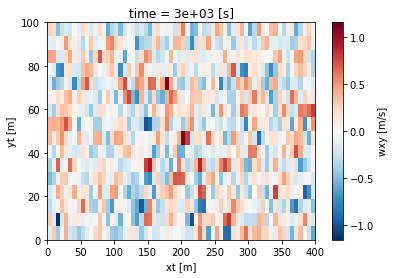

In [137]:
cross.sel(time = [3000], method="nearest").wxy.plot()

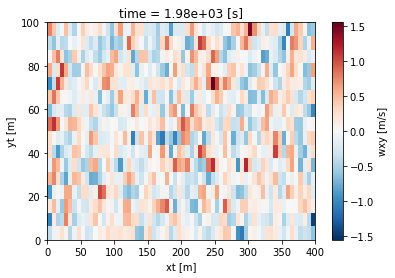

In [138]:
cross.sel(time = [2000], method="nearest").wxy.plot()

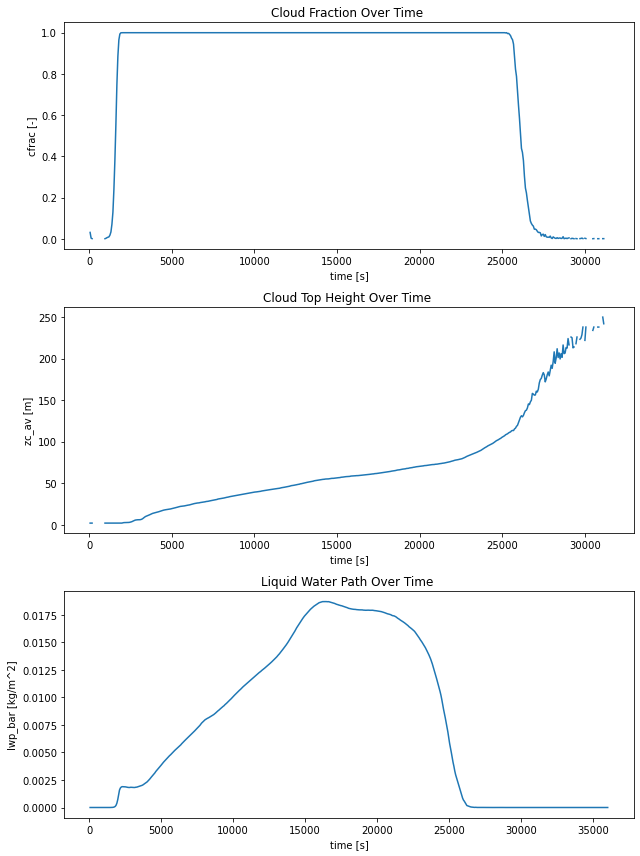

In [38]:
fig, axs = plt.subplots(nrows=3, figsize = (9, 12))
plot1 = tmser.cfrac.plot(ax=axs[0])
plot2 = tmser.zc_av.plot(ax=axs[1])
plot3 = tmser.lwp_bar.plot(ax=axs[2])

plt.tight_layout()
axs[0].set_title('Cloud Fraction Over Time ')
axs[1].set_title('Cloud Top Height Over Time ')
axs[2].set_title('Liquid Water Path Over Time ')
# axs[3].set_title('Liquid Water Path Over Time ')
plt.tight_layout()
plt.show()

<xarray.DataArray 'cfrac' (time: 600)>
array([0.030762, 0.00293 , 0.000488, ...,      nan,      nan,      nan],
      dtype=float32)
Coordinates:
  * time     (time) float32 60.0 120.0 180.0 ... 3.588e+04 3.594e+04 3.6e+04
Attributes:
    longname:  Cloud fraction
    units:     -